In [134]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [5]:
data = pd.read_excel("Online Retail.xlsx")

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
data = data[pd.notnull(data['CustomerID'])]

In [10]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

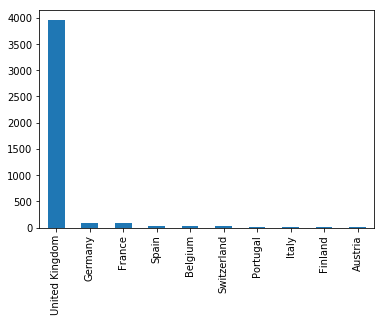

In [12]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [16]:
uk_data=data[data.Country=='United Kingdom']

In [17]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      361878 non-null object
StockCode      361878 non-null object
Description    361878 non-null object
Quantity       361878 non-null int64
InvoiceDate    361878 non-null datetime64[ns]
UnitPrice      361878 non-null float64
CustomerID     361878 non-null float64
Country        361878 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [18]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [20]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [21]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [23]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [24]:
# setting up a present date. Here it's ~ a year after the data was collected, which makes sense for analysis
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [25]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


# RFM Analysis

In [73]:
rfm = uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [74]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [75]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [76]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']

In [77]:
rfm

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [78]:
rfm['recency'] = rfm['recency'].astype(int)

In [79]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [81]:
# rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
# rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
# rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm['r_quartile'] = pd.qcut(rfm['recency'], 2, ['1','2'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 2, ['2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 2, ['2','1'])

In [82]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,2,2,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,1,1


In [83]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,2,2,1,221
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,1,1,111


In [84]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16029.0,38,242,81024.84,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111


## Visualization

In [85]:
rfm.shape

(3921, 7)

In [86]:
print(rfm[rfm['RFM_Score']=='111'].shape)
print(rfm[rfm['RFM_Score']=='222'].shape)
# print(rfm[rfm['RFM_Score']=='333'].shape)
# print(rfm[rfm['RFM_Score']=='444'].shape)

(1170, 7)
(1147, 7)


In [87]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,2,2,1,221
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,1,1,111
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,2,2,2,222
18281.0,180,7,80.82,2,2,2,222
18282.0,7,12,178.05,1,2,2,122


In [108]:
rfm_plot = pd.DataFrame(rfm).drop(['r_quartile', 'f_quartile', 'm_quartile'], axis=1)

In [89]:
# rfm
rfm_plot

,recency,frequency,monetary,RFM_Score
CustomerID,,,,
12346.0,325,1,77183.60,221
12747.0,2,103,4196.01,111
12748.0,0,4596,33719.73,111
12749.0,3,199,4090.88,111
12820.0,3,59,942.34,111
...,...,...,...,...
18280.0,277,10,180.60,222
18281.0,180,7,80.82,222
18282.0,7,12,178.05,122


In [58]:
import seaborn as sns
sns.set(style="whitegrid")

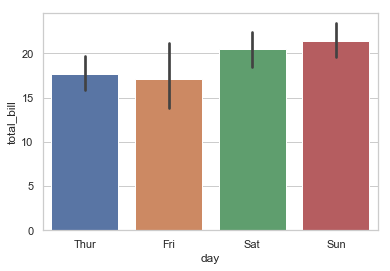

In [61]:
# example
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [60]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [62]:
# add categories column. 4 categories (111, 222, 333, 444)
# rfm_plot['Category'] = [1 if ]

,recency,frequency,monetary,RFM_Score
CustomerID,,,,
12346.0,325,1,77183.60,441
12747.0,2,103,4196.01,111
12748.0,0,4596,33719.73,111
12749.0,3,199,4090.88,111
12820.0,3,59,942.34,122
...,...,...,...,...
18280.0,277,10,180.60,444
18281.0,180,7,80.82,444
18282.0,7,12,178.05,144


In [153]:
# ax = sns.barplot(x="day", y="total_bill", data=rfm_plot)
myplot = rfm_plot.sort_values(by=['RFM_Score'])
rfm_plot.sort_values(by=['RFM_Score']).RFM_Score.unique()

array(['111', '112', '121', '122', '211', '212', '221', '222'],
      dtype=object)

In [154]:
# make 3 groups 

In [155]:
myplot

,recency,frequency,monetary,RFM_Score
CustomerID,,,,
18287.0,42,70,1837.28,111
17324.0,17,50,990.23,111
14794.0,2,80,1319.91,111
14790.0,16,46,745.06,111
17338.0,17,753,6643.93,111
...,...,...,...,...
15224.0,358,14,322.08,222
15225.0,234,23,409.40,222
15226.0,310,8,154.41,222


In [117]:
# myplot['RFM_Score_sum'] = int(myplot['RFM_Score']).sum
myplot['RFM_Score_sum'] = myplot['RFM_Score'].sum
# myplot.describe()
# myplot['RFM_Score']

In [127]:
# myplot.dtypes
# myplot['RFM_Score'] = myplot['RFM_Score'].astype(str)

In [156]:
myplot.dtypes

recency        int64
frequency      int64
monetary     float64
RFM_Score     object
dtype: object

In [157]:
type(myplot['RFM_Score'])

pandas.core.series.Series

In [158]:
# myplot['RFM_Score'] = myplot['RFM_Score'].astype(np.int64)

In [188]:
def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

In [189]:
myplot['RFM_Score_sum'] = [sum_digits(x) for x in myplot['RFM_Score']]

In [190]:
# myplot
# digitsum(myplot['RFM_Score'])
# myplot['RFM_Score']
# sum_digits(myplot['RFM_Score'].iloc[0])
myplot

,recency,frequency,monetary,RFM_Score,RFM_Score_sum
CustomerID,,,,,
18287.0,42,70,1837.28,111,3
17324.0,17,50,990.23,111,3
14794.0,2,80,1319.91,111,3
14790.0,16,46,745.06,111,3
17338.0,17,753,6643.93,111,3
...,...,...,...,...,...
15224.0,358,14,322.08,222,6
15225.0,234,23,409.40,222,6
15226.0,310,8,154.41,222,6


In [186]:
print(myplot.RFM_Score_sum.unique())
print(type(myplot.RFM_Score_sum.unique()))

[3 4 5 6]
<class 'numpy.ndarray'>


In [200]:
myplot[myplot['RFM_Score_sum'] == 5]

,recency,frequency,monetary,RFM_Score,RFM_Score_sum,category
CustomerID,,,,,,
15699.0,17,18,309.65,122,5,Unknown
14345.0,38,6,108.98,122,5,Unknown
16811.0,4,28,547.07,122,5,Unknown
15692.0,28,12,191.04,122,5,Unknown
15830.0,37,39,576.00,122,5,Unknown
...,...,...,...,...,...,...
14603.0,274,2,660.00,221,5,Unknown
15299.0,67,7,4507.01,221,5,Unknown
15304.0,60,23,694.40,221,5,Unknown


In [201]:
myplot['category'] = np.select(
    [
        myplot['RFM_Score_sum'] == 3,
        myplot['RFM_Score_sum'] == 4,
        myplot['RFM_Score_sum'] == 5,
        myplot['RFM_Score_sum'] == 6
    ], 
    [
        'Good',
        'Medium',
        'Medium',
        'Bad'
    ], 
    default='Unknown'
)

In [203]:
myplot

,recency,frequency,monetary,RFM_Score,RFM_Score_sum,category
CustomerID,,,,,,
18287.0,42,70,1837.28,111,3,Good
17324.0,17,50,990.23,111,3,Good
14794.0,2,80,1319.91,111,3,Good
14790.0,16,46,745.06,111,3,Good
17338.0,17,753,6643.93,111,3,Good
...,...,...,...,...,...,...
15224.0,358,14,322.08,222,6,Bad
15225.0,234,23,409.40,222,6,Bad
15226.0,310,8,154.41,222,6,Bad


In [206]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


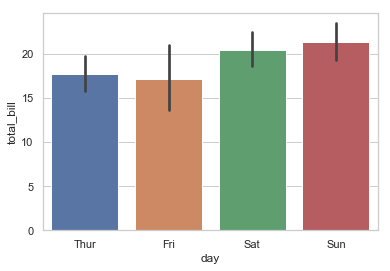

In [207]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [208]:
myplot

,recency,frequency,monetary,RFM_Score,RFM_Score_sum,category
CustomerID,,,,,,
18287.0,42,70,1837.28,111,3,Good
17324.0,17,50,990.23,111,3,Good
14794.0,2,80,1319.91,111,3,Good
14790.0,16,46,745.06,111,3,Good
17338.0,17,753,6643.93,111,3,Good
...,...,...,...,...,...,...
15224.0,358,14,322.08,222,6,Bad
15225.0,234,23,409.40,222,6,Bad
15226.0,310,8,154.41,222,6,Bad


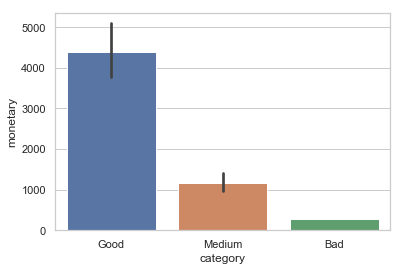

In [209]:
ax = sns.barplot(x="category", y="monetary", data=myplot)